# Prediccion de digitos con SVM

In [255]:
#Librerias
import numpy as np #matrices
import pandas as pd #datos
import sklearn as sk #algoritmos ML
import math
import matplotlib.pyplot as plt #graficas

In [3]:
#descarga del data set
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
#descripcion del data set
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [4]:
#encabezados
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
#estructura de imagenes 8x8 pixeles
digits.images.shape

(1797, 8, 8)

In [7]:
#nombre de las etiquetas
for num in digits.target_names:
    print(num)

0
1
2
3
4
5
6
7
8
9


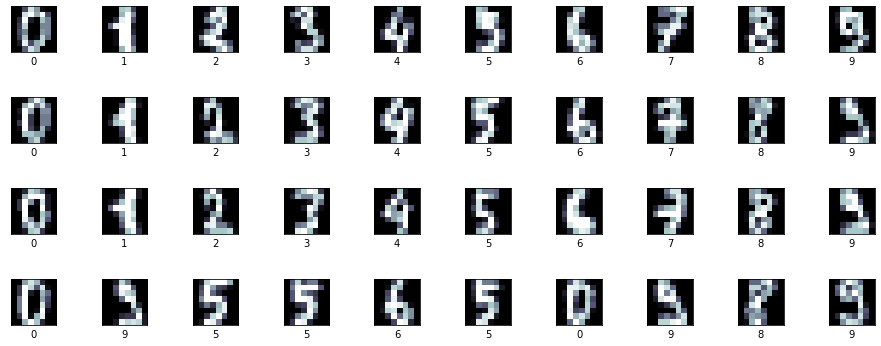

In [8]:
#Visualizacion de 40 imagenes con su etiqueta
fig = plt.figure(figsize = (12,12))
fig.subplots_adjust(left=0, right=1, bottom=0,top=1, hspace=1,wspace=1)
for i in range(40):
    im = fig.add_subplot(10,10,i+1)
    im.imshow(digits.images[i], cmap=plt.cm.bone)
    im.set(xticks=[],yticks=[],xlabel=digits.target_names[digits.target[i]])

In [10]:
#division del set de datos en entrenamiento (80%) y prueba (20%)
from sklearn.model_selection import train_test_split #forma aleatoria
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

In [265]:
#entrenamiento del algoritmo Maquina de Soporte Vectorial
from sklearn.svm import SVC #clasificacion
#se toma un kernel polinomial
svc = SVC(kernel="linear", class_weight = "balanced")
svc.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear')

In [266]:
#Validacion cruzada K-fold
from sklearn.model_selection import cross_validate
from scipy.stats import sem
from sklearn.model_selection import cross_val_score

In [267]:
scores = cross_val_score(svc, X_train, y_train, cv=5)
print(scores)

[0.97569444 0.97222222 0.96515679 0.9825784  0.95818815]


In [268]:
#precision para 5 folds
print(np.mean(scores))

0.9707680023228804


In [269]:
#reporte de clasificacion
y_pred = svc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Exactitud en el conjunto de prueba: {}'.format(test_accuracy))
print(classification_report(y_test, y_pred))

Precisión en el conjunto de prueba: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



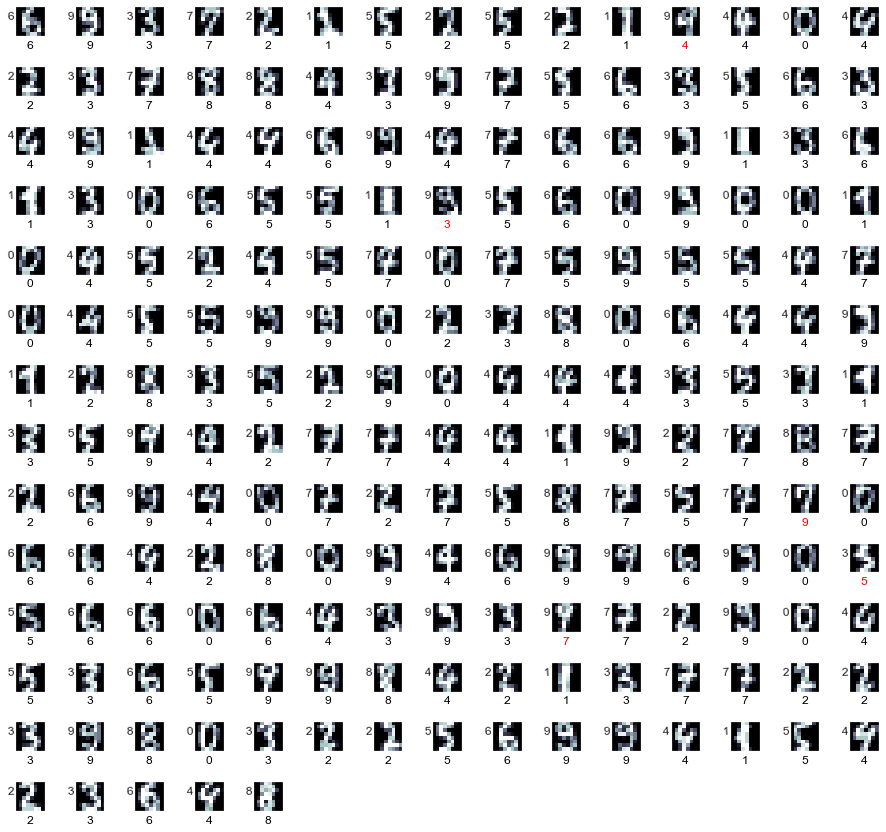

In [270]:
#cuales imagenes no corresponden
fig = plt.figure(figsize = (12,12))
fig.subplots_adjust(left=0, right=1, bottom=0,top=1, hspace=1,wspace=1)
for i in range(200):
    im = fig.add_subplot(15,15,i+1)
    im.imshow(X_test[i].reshape(8,8), cmap=plt.cm.bone)
    im.set(xticks=[],yticks=[]) 
    im.set_xlabel(digits.target_names[y_pred[i]],
                  color = 'black' if y_pred[i] == y_test[i] else 'red')
    im.set_ylabel(digits.target_names[y_test[i]],rotation= math.pi)

In [257]:
#matriz de confusion
mat = confusion_matrix(y_test, y_pred)

<AxesSubplot:title={'center':'Matriz de Confusion'}>

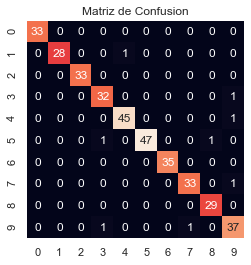

In [275]:
import seaborn as sns; sns.set()
plt.title('Matriz de Confusion')
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False,
           xticklabels=digits.target_names, yticklabels=digits.target_names)


# Extra

In [153]:
#dada una imagen decir si es o no un digito

In [122]:
#arreglos auxiliares
X, y = digits["data"], digits["target"]

In [190]:
#valores booleanos segun sea o no 7.
y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)

In [198]:
#entrena algoritmo Naive Bayes (valores discretos)
from sklearn.naive_bayes import MultinomialNB 
mnb = MultinomialNB()
mnb.fit(X_train, y_train_7)

MultinomialNB()

In [136]:
digito = X[17]

In [221]:
mnb.predict([digito])

array([ True])

In [ ]:
#decir si la imagen corresponde a un digito en especifico

In [222]:
y_pred = []
for dig in X_test:
    y_pred = np.append(y_pred, mnb.predict([dig]))    

In [223]:
#reporte de clasificacion
print(classification_report(y_test_7,y_pred))

              precision    recall  f1-score   support

       False       1.00      0.98      0.99       326
        True       0.87      0.97      0.92        34

    accuracy                           0.98       360
   macro avg       0.93      0.98      0.95       360
weighted avg       0.98      0.98      0.98       360



In [224]:
y_test_si=[]
for dig in y_test_7:
    if dig == False:
        y_test_si = np.append(y_test_si, "nosiete")
    else:
        y_test_si = np.append(y_test_si, "siete")

In [225]:
y_pred_si=[]
for dig in y_pred:
    if dig == 0:
        y_pred_si = np.append(y_pred_si, "nosiete")
    else:
        y_pred_si = np.append(y_pred_si, "siete")

In [226]:
#matriz de confusion 
print(pd.crosstab(y_test_si,y_pred_si,rownames=['True'],colnames=['Predicted'],margins=True))

Predicted  nosiete  siete  All
True                          
nosiete        321      5  326
siete            1     33   34
All            322     38  360
